# Time series analysis for small business 

Incertenty is the biggest enemy of a profitable business. That is espiciealy true of small business who don’t have enouph resource to adapt to sodden increase of cost, an unexpected drop of revenue or to capitalize on a opportunity in a small window. In that situation it is especyaly important to be able to predict accurately the change of operation to stay competitive.
Just think about your favorite restaurant and all the things a good manager must estimate to give a good service and still make profit: how many people will eat at his restaurant each hour, how that value will chage during the day, how many order of each dish should be bought, how much time the service will take, are all variables that he must estimate before ordering food, making schedule for his staff, fixing price, hiring or laying out staff etc. Basically, making prediction is something all business owner do before making a choice, sometime without knowing it, and the quality of the choice depend on the quality of the prediction. In that context, it’s not a surprice that the best entrepreneur are the one who are the better to anticipate the future.

In this series of post, you will see how to use data to make sound predictions. First, you’ll learn how to use the fondamental R functions which will be used througout this seris and you'll verify the stationnarity of a time series.

Uncertainty is the biggest enemy of a profitable business. That is especially true of small business who don’t have enough resources to survive an unexpected diminution of revenue or to capitalize on a sudden increase of the demand. In this context, it is especially important to be able to predict accurately the change in the markets to be able to make better decision and stay competitive.

This series of posts will teach you how to use data to make sound prediction. In this first set of exercises, you’ll learn the essential concepts we'll use throughout the series: how to use the fundamental R tools for time series analysis, how to verify if a time series is stationary and how to make prediction in that context.

To be able to do theses exercice, you have to have installed the packages "forecast" and "tseries". Also, use the data() function to load the "treering" dataset from the R library. 

# Part 1

The full exercises set can be found <a href="http://www.r-exercises.com/2017/04/13/forecasting-for-small-business-exercises-part-1/">here</a>.

In [195]:
library(help="datasets") 

exercice 1 Use the data() function to load the "treering" dataset from the R library. This dataset is loaded as an R time series object which is a vector whose value are ordered chronologically. Look at the structure of this ts object and use another function to find the number of observations in the dataset.

In [2]:
data(treering)
str(treering)
length(treering)

 Time-Series [1:7980] from -6000 to 1979: 1.34 1.08 1.54 1.32 1.41 ...


[1] 7980

exercice 2 Use the function window(ts, start, end) to select the observations in the treering dataset from the year 1500 to the year 2000.

In [3]:
ts1 <- window(treering, start=1500, end=2000)

Warning message in window.default(x, ...):
"'end' value not changed"

exercice 3 Do a basic plot of the treering dataset and use the abline function to add an horizontal red line representing the mean of the dataset.    

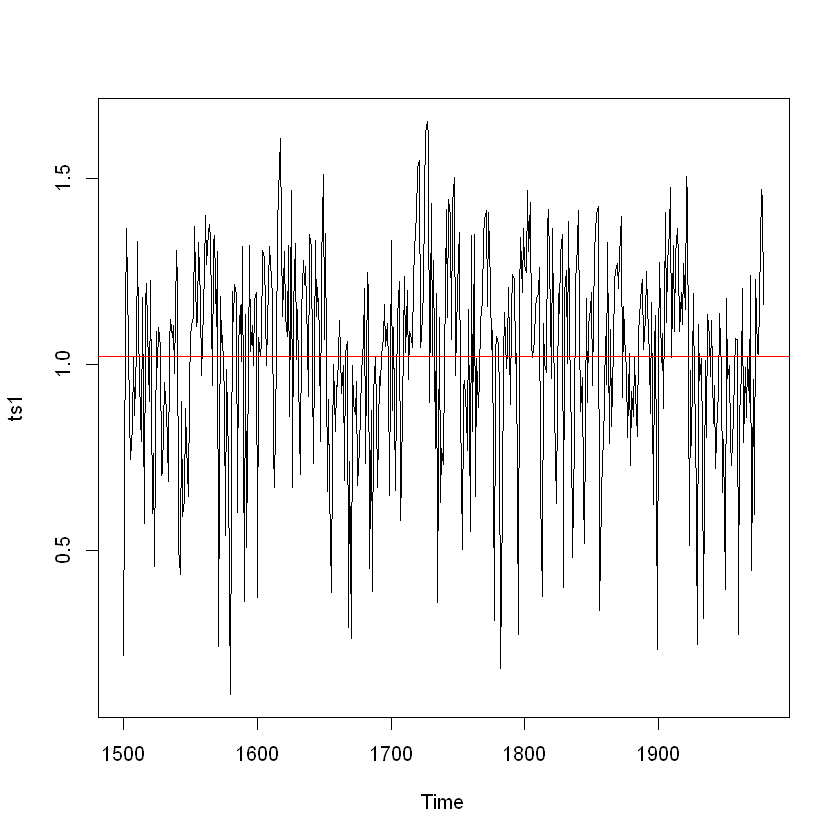

In [4]:
plot(ts1)
abline(a=mean(ts1),b=0, col = "red")


Looking at the previous plot, we get the sense that these values are randomly distributed around the red line who represent the mean of the data set. Also the magnitude of the random fluctuation of the points seems to stay stable over time. Such a time series is called "stationary" and it is a propriety we prefer to observe in a time series when we want to make predictions.

To make sure that the time series is stationary, we'll draw the autocorrelation plot and run the Box-Ljung test, Kwiatkowski-Phillips-Schmidt-Shin test and the Augmented Dickey–Fuller test on the dataset.

Exercice 4 Load the "forecast" package and use the Acf function to draw the autocorrelation plot of the time series.

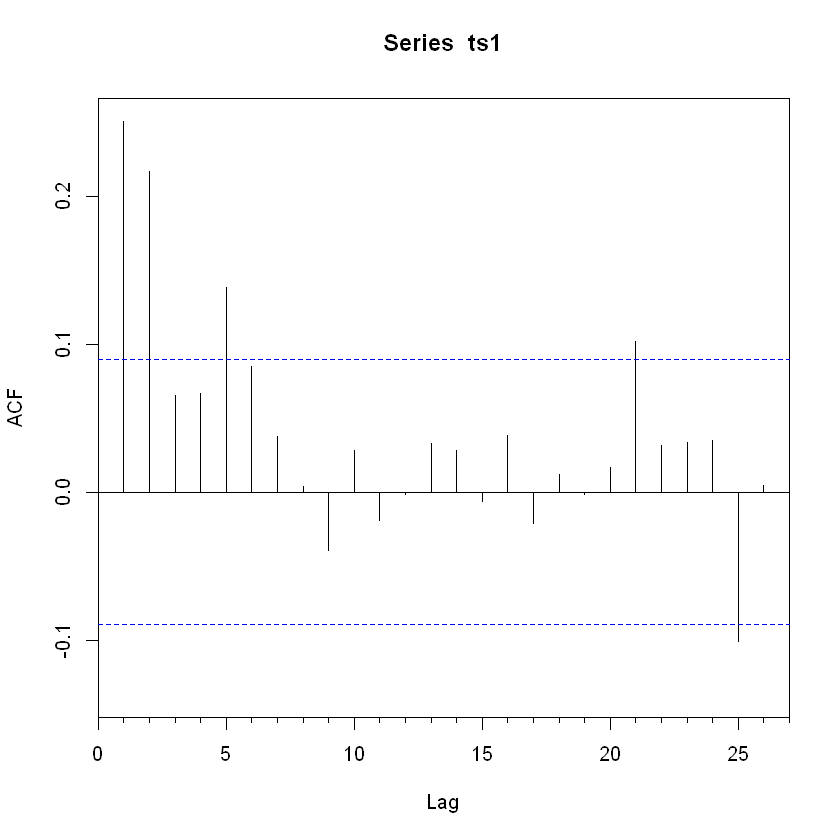

In [5]:
library("forecast")
Acf(ts1)

# Part 2

In the first set of exercises, we've seen how to make predictions in the case where the mean and the variance of the time series is constant. Now, we'll see how to deal with time series whose mean change over time. 

The basic type of time series who is not stationary is called a random walk. This random process is obtained by adding each random fluctuation of a stationary time series to the sum of all the previous one. In consequence, the mean of such a time series will change over time, so it's not stationary, but his variance will stay the same. You can find more information about random walk <a href="https://en.wikipedia.org/wiki/Random_walk#Gaussian_random_walk">here.</a>

<strong>Exercise 1</strong>
Set the seed to 42 and generate 100 random points from a normal distribution of mean 0 and standard deviation of 1 to simulate a white noise. Then use the <code>cumsum()</code> function to sum the point of the white noise and simulate a random walk. Finally, use the <code>as.ts()</code> function with the correct argument to create a time series named <code>random.walk1</code>.



In [1]:
set.seed(42)
random<-rnorm(100, mean = 0, sd = 1)
ts1<-cumsum(random)
random.walk1<-as.ts(ts1,start=1, end=100, frequency = 1)


<strong>Exercise 2</strong>
Do a basic plot of <code>random.walk1</code>.



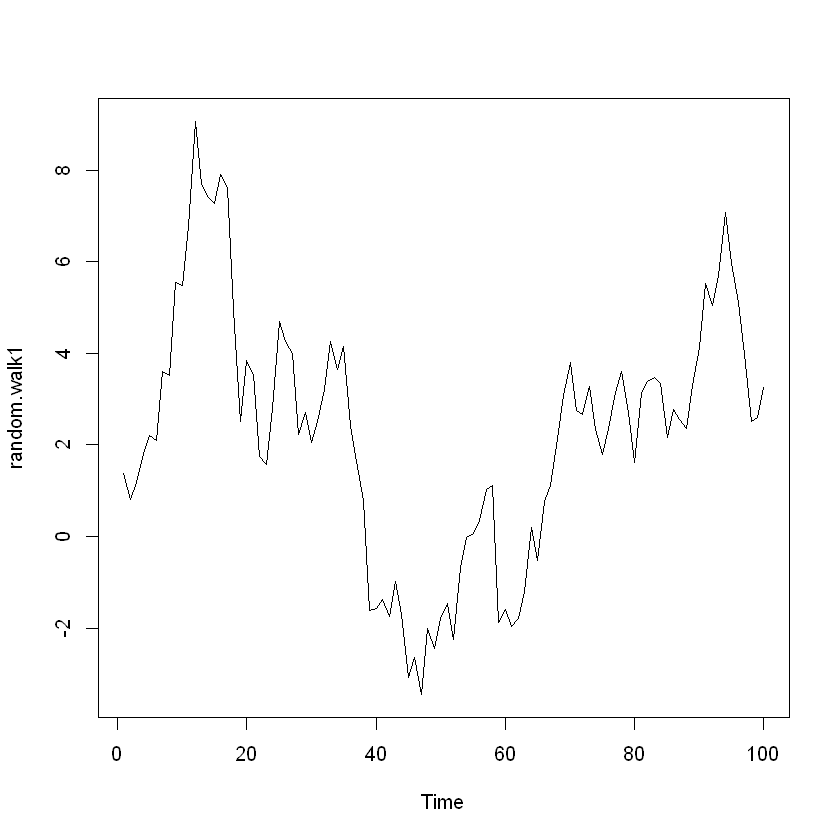

In [2]:
ts.plot(random.walk1)

<strong>Exercise 3</strong>
Follow the steps of exercise 1, but this time generates 100 points from a normal distribution with a mean of 0.5 and a standard deviation of 1. Save the time series in a variable called <code>random.walk2</code>, then plot it.

If we look at the previous plot, we see that there is a general positive trend in the data. This resulted from the fact that the white noise component of the random walk has a mean greater than 0 and a relatively small standard derivation. In consequence, those values are generally positive and since those components are adding together, each observation of the random walk has a good chance to be greater than their predecessor.



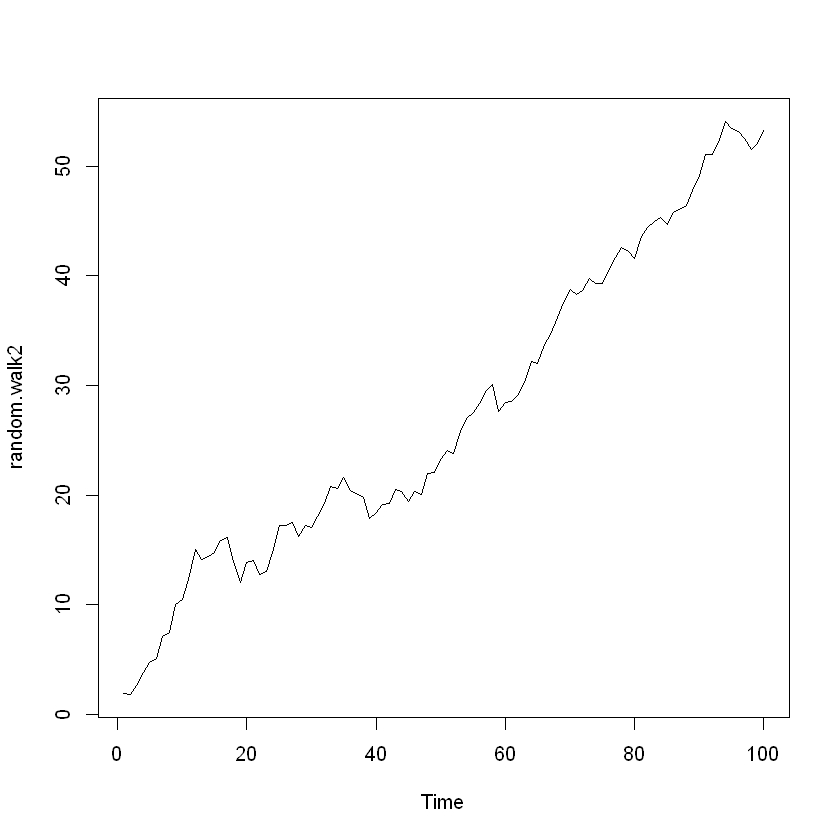

In [3]:
set.seed(42)
random<-rnorm(100, mean = 0.5, sd = 1)
ts2<-cumsum(random)
random.walk2<-as.ts(ts2,start=1, end=100, frequency = 1)
ts.plot(random.walk2)

<strong>Exercise 4</strong>
To get a sense of how the mean and the standard deviation of the white noise affect the shape of the resulting time series, generate 100 points of a random walk with a white noise component of:

 <ul>
  <li>mean = -0.5 and st=1</li>
  <li>mean = 2 and st=1</li>
  <li>mean = 10 and st=1</li>
  <li>mean = 0.5 and st=10</li>
</ul> 

Again, set the seed to 42 and plot your result.

From the first plot, we can see that the sign of the mean of the white noise component determines the sign of the trend line of the curve. If the mean is positive the trend tend to be positive and vice versa. From the other plot, we see how the relative magnitude of the mean and the standard deviation affect the shape of the curve. Since the standard deviation of the white noise determines the degree of randomness of the observations, the greater is this value compared to the mean, the less we can see a trend in the data. The opposite is also true: greater is the mean compared to the standard deviation, the more the curve of the time series tend to be close to the trend line. 

In the <a href="http://www.r-exercises.com/2017/04/13/forecasting-for-small-business-exercises-part-1/">last set of exercises</a>, we have seen how to do prediction on a time series who's stationery. Since a random walk doesn't have a constant mean, we cannot directly follow the same steps.


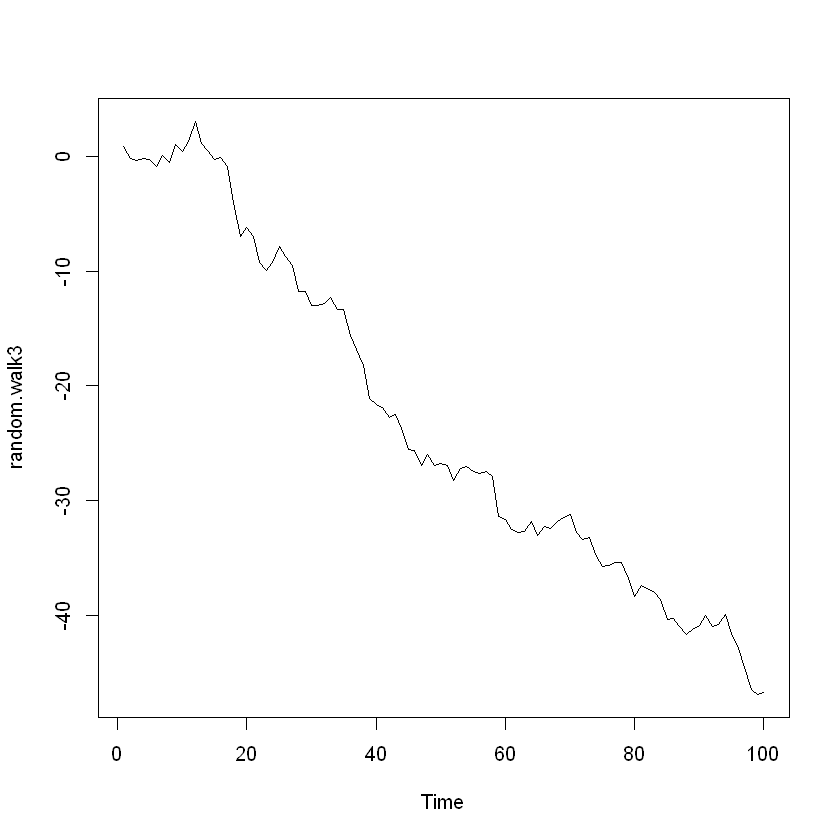

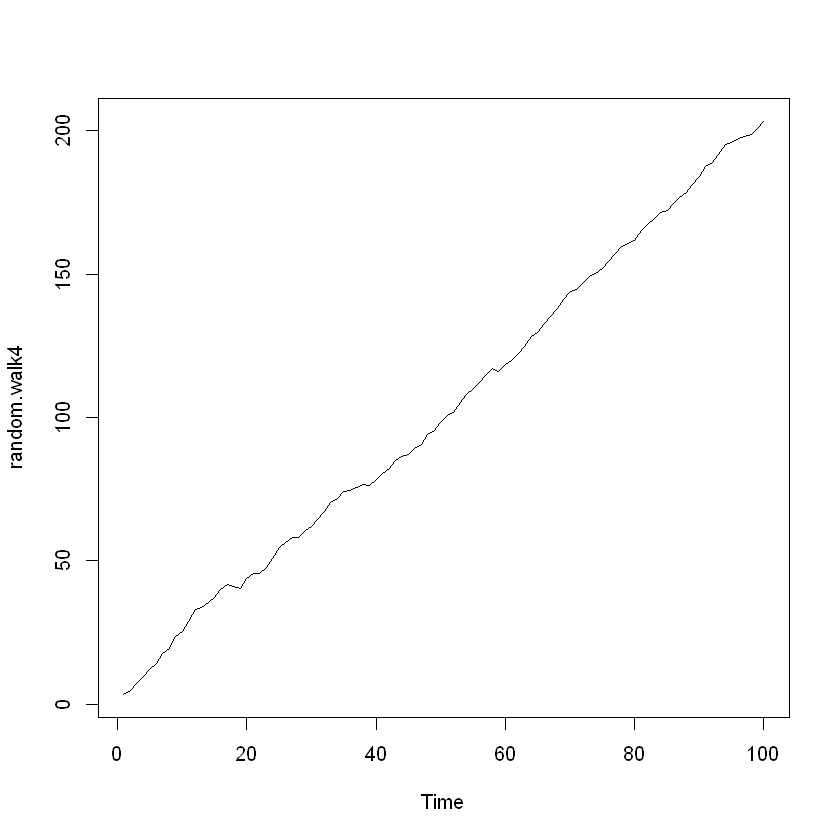

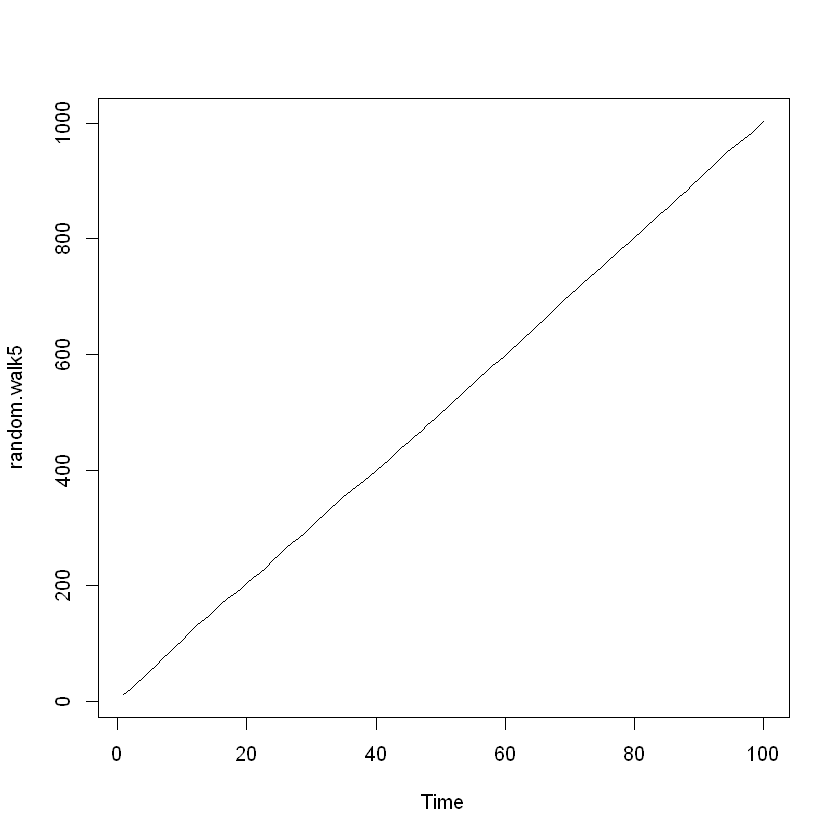

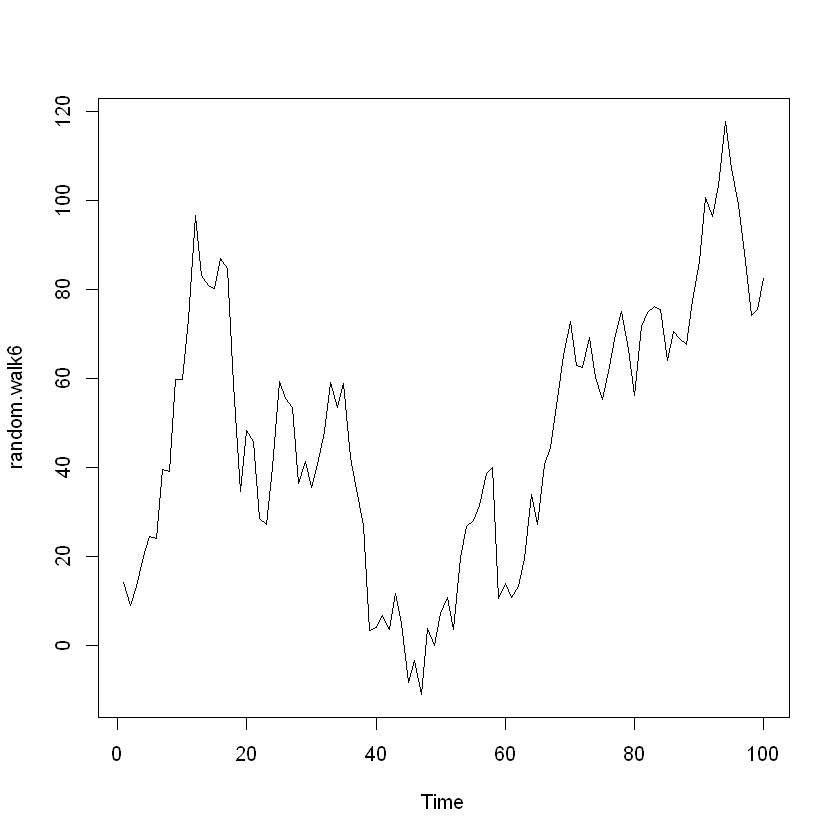

In [4]:
set.seed(42)
random<-rnorm(100, mean = -0.5, sd = 1)
ts3<-cumsum(random)
random.walk3<-as.ts(ts3,start=1, end=100, frequency = 1)
ts.plot(random.walk3)

set.seed(42)
random<-rnorm(100, mean = 2, sd = 1)
ts4<-cumsum(random)
random.walk4<-as.ts(ts4,start=1, end=100, frequency = 1)
ts.plot(random.walk4)

set.seed(42)
random<-rnorm(100, mean = 10, sd = 1)
ts5<-cumsum(random)
random.walk5<-as.ts(ts5,start=1, end=100, frequency = 1)
ts.plot(random.walk5)

set.seed(42)
random<-rnorm(100, mean = 0.5, sd = 10)
ts6<-cumsum(random)
random.walk6<-as.ts(ts6,start=1, end=100, frequency = 1)
ts.plot(random.walk6)

# Part 3

In the last set of exercises, we've seen how to make predictions on a random walk by isolating the white noise components via differentiation of the term of the time series. But this approach is valid only if the random components of the time series follow a normal distribution of constant mean and variance and if those components are added together in each iteration to create the new observations.

Today, we'll see some transformations we can apply on the time series make them stationary, especially how to stabilise variance and how to detect and remove seasonality in a time series.

To be able to do theses exercise, you have to have installed the packages <code>forecast</code> and <code>tseries</code>.

The full exercises set can be found <a href="http://www.r-exercises.com/2017/04/25/forecasting-for-small-business-exercises-part-3/">here</a>.

<strong>Exercise 1</strong>
Use the <code>data()</code> function to load the <code>EuStockMarkets</code> dataset from the R library. Then use the <code>diff()</code> function on <code>EuStockMarkets[,1]</code> to isolate the random component and plot them. This differentiation is the most used transformation with time series.




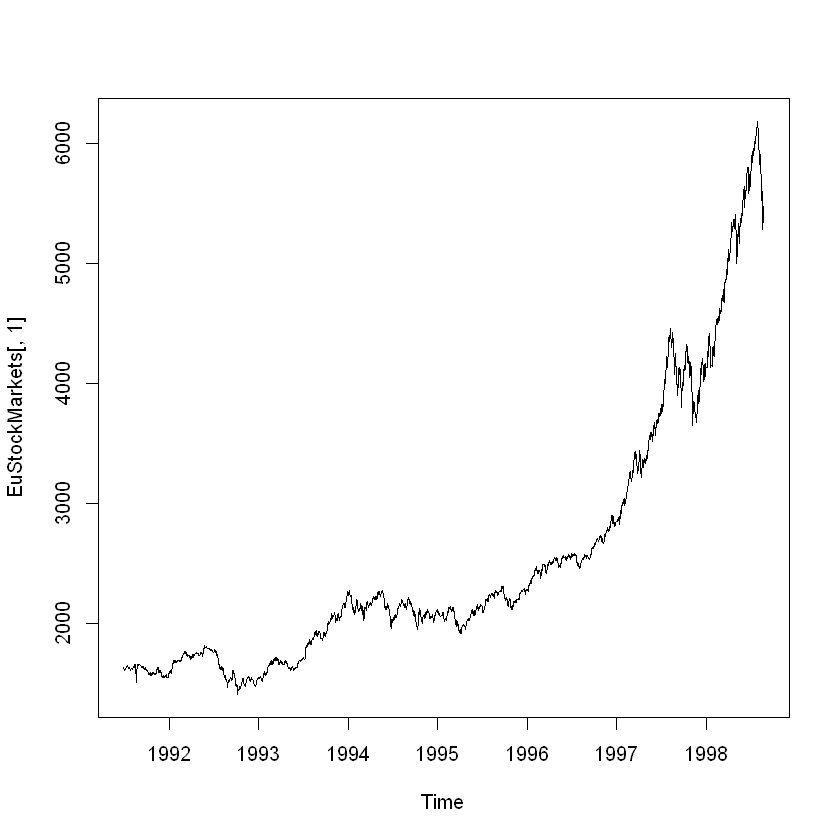

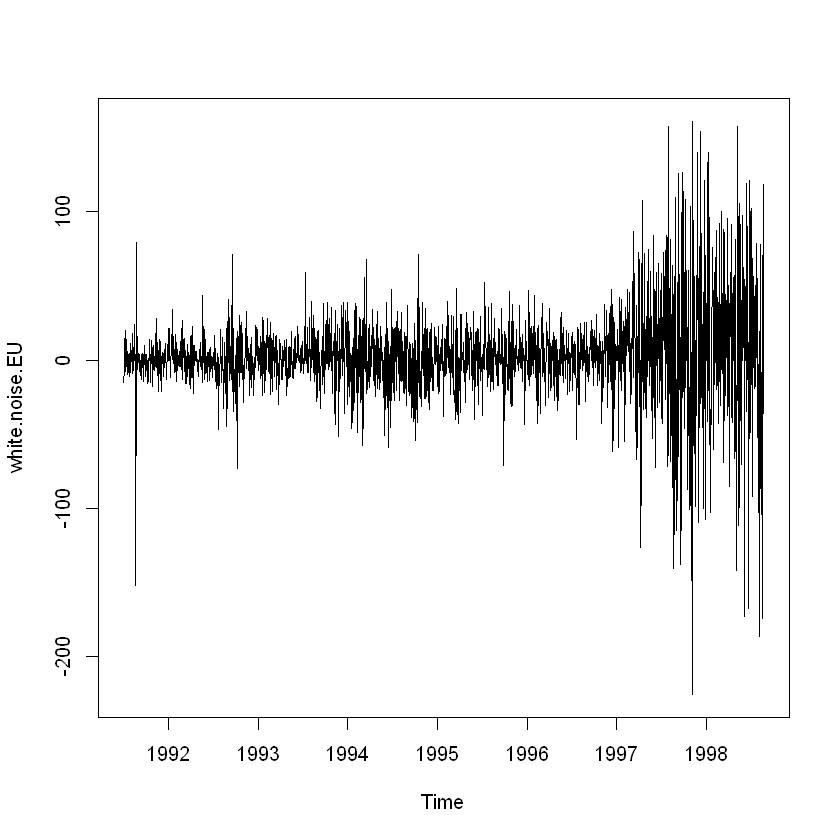

In [1]:
data(EuStockMarkets)
plot(EuStockMarkets[,1])
white.noise.EU<-diff(EuStockMarkets[,1],lag=1)
plot(white.noise.EU)


We can see that the mean of the random component of the time series seems to stay constant over time, but the variance seems to get bigger near 1997.

<strong>Exercise 2</strong>
Apply a the <code>log()</code> function on <code>EuStockMarkets[,1]</code> and repeat the step of exercise 1. The logarithmic transformation is often used to stabilise non constant variance.



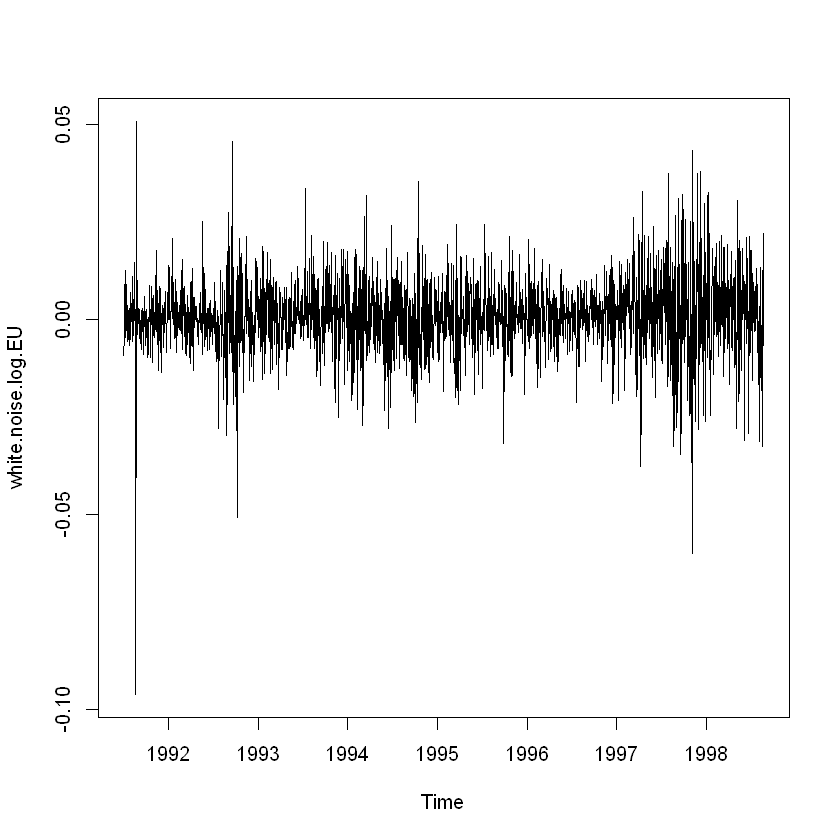

In [2]:
white.noise.log.EU<-diff(log(EuStockMarkets[,1]),lag=1)
plot(white.noise.log.EU)


<strong>Exercise 3</strong>
Use the <code>adf.test()</code> function from the <code>tseries</code> package to test if the time series you obtain in the last exercise is stationary. Use a lag of 1.



In [6]:
library("tseries")
adf.test(white.noise.log.EU,k=1, alternative="stationary")

Warning message:
"package 'tseries' was built under R version 3.3.3"Warning message in adf.test(white.noise.log.EU, k = 1, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  white.noise.log.EU
Dickey-Fuller = -31.343, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


<strong>Exercise 4</strong>
Load and plot the <code>co2</code> dataset from the R library <code>dataset</code>. Use the <code>lowess()</code> function to create a trend line and add it to the plot of the time series.



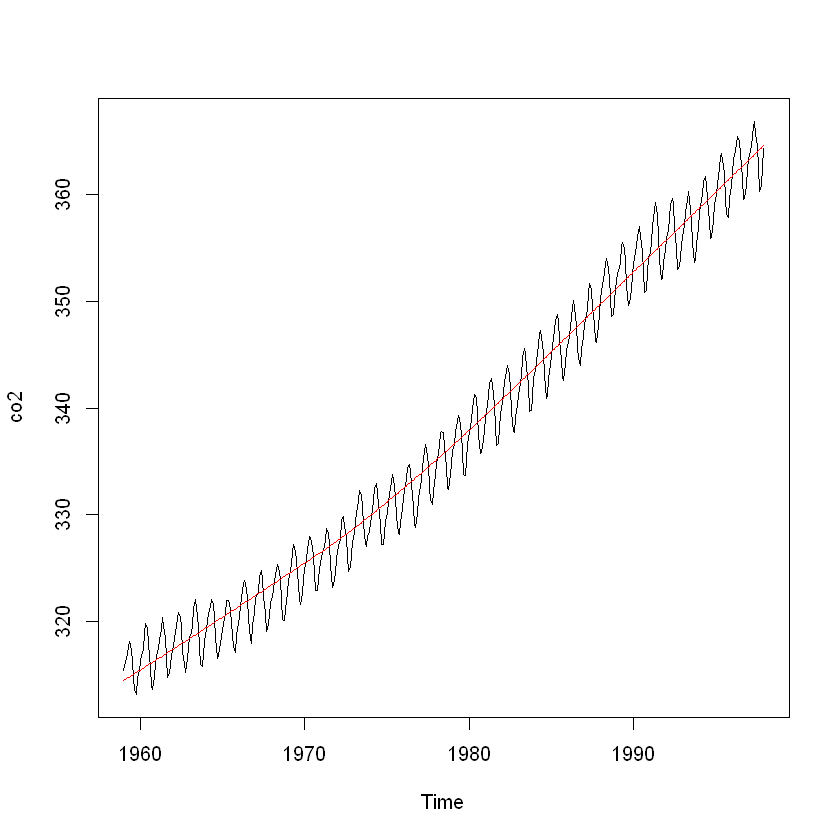

In [7]:
data(co2)
plot(co2)
lines(lowess(co2), col = "red")

By looking at the last plot, we can see that the time series oscillate from one side to the other of the trend line with a constant period. That characteristic is called seasonally and is often observed in time series. Just think about temperature, which change predictably from season to season.

<strong>Exercise 5</strong>
To eliminate the upward trend in the data use the <code>diff()</code> function and save the resulting time series in a variable called <code>diff.co2</code>. Plot the autocorrelation plot of <code>diff.co2</code>.

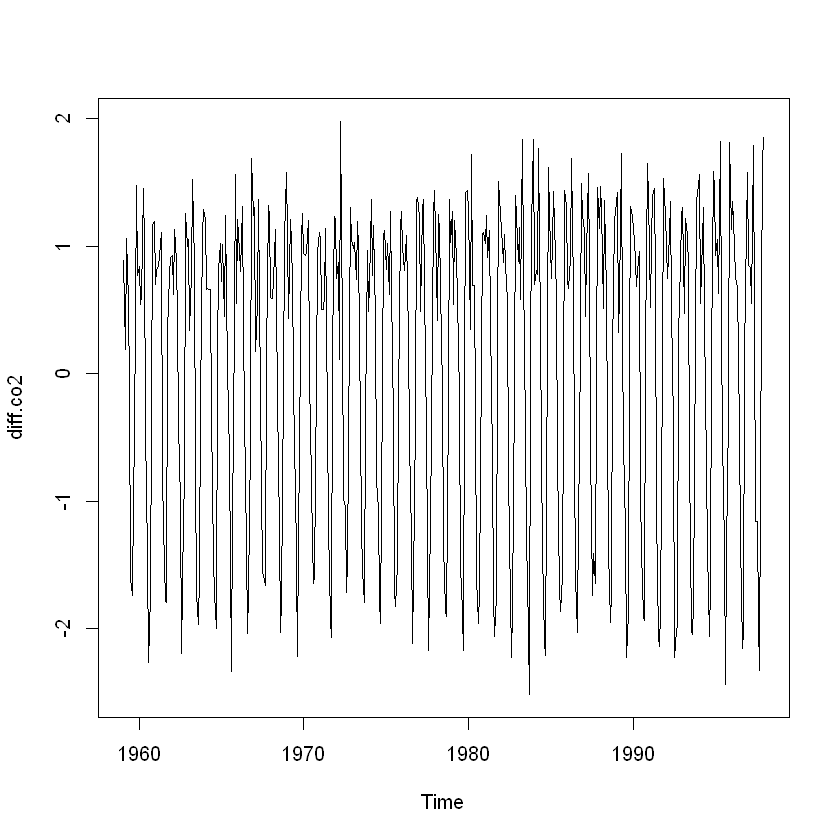

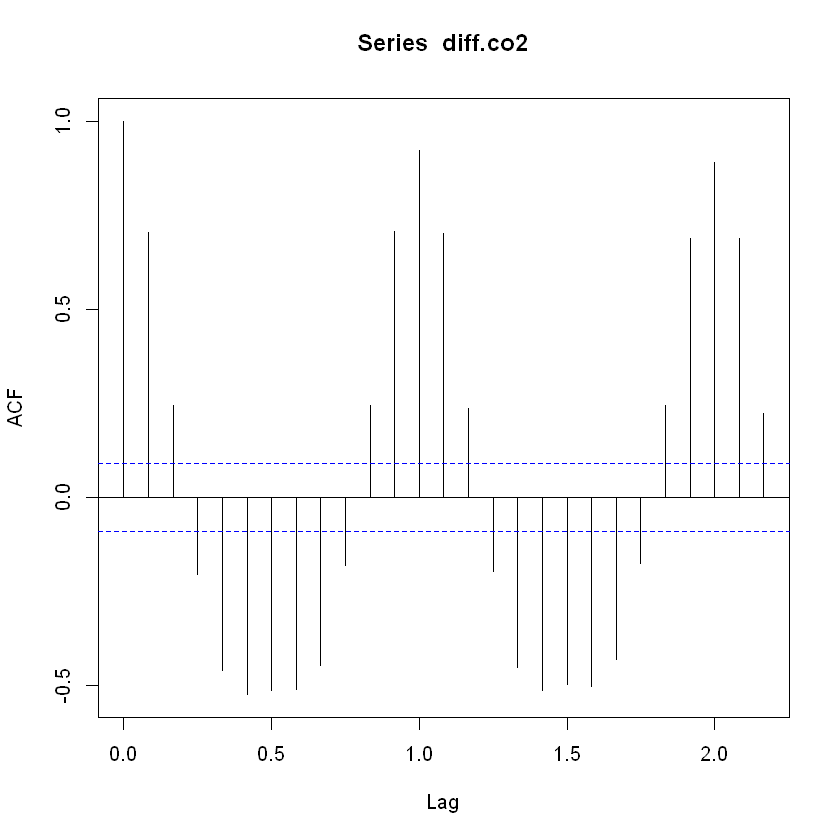

In [8]:
diff.co2<-diff(co2,lag=1)
plot(diff.co2)
acf(diff.co2)


# Part 4

In the previous post we have seen the fundamental models of time series. We've seen what's a white noise, what's a random walk, what is seasonality and which transformation to use to make a time series stationary. Today, we'll see some basic methods for predicting the values of a time series and how to select which method to use.

To be able to do theses exercise, you have to have installed the packages <code>forecast</code> and <code>smooth</code>. Also, when you generate a random number or process, set the seed to 42 to have results identical to those on the solution set.

The full exercises set can be found <a href="http://www.r-exercises.com/2017/05/02/forecasting-for-small-business-exercises-part-4/">here</a>.

<strong>Exercise 1</strong>
Create an artificial time series, which we'll use to test the different forecasting methods we'll use today. This random walk should have a white noise component with a mean of 0.5 and a standard deviation of 1, should have 365 observations with a frequency and deltat of 1.


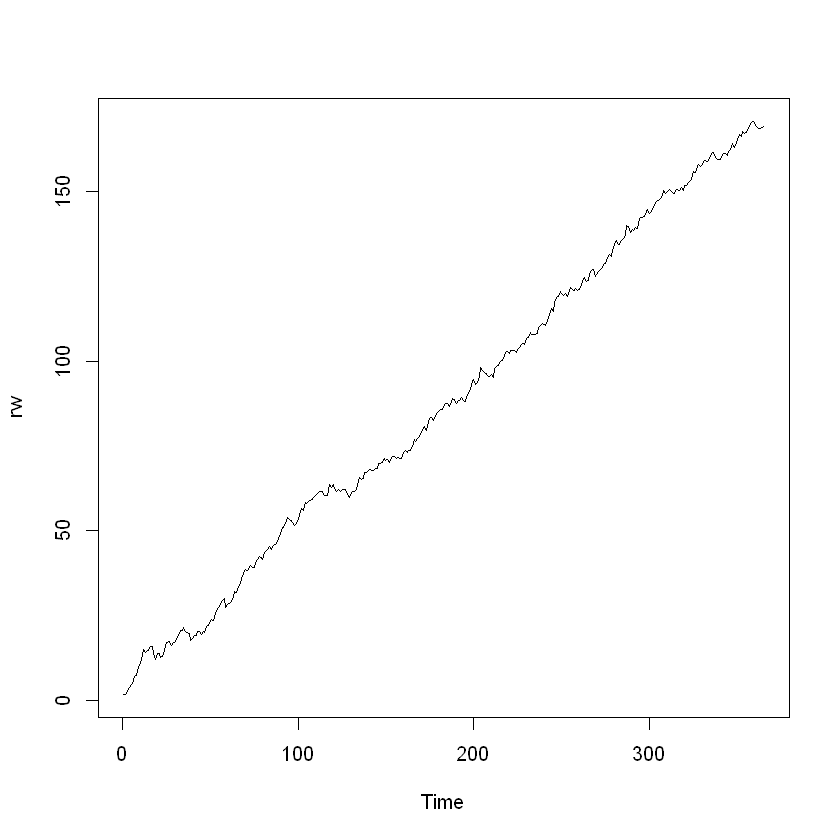

In [9]:
set.seed(42)
rw <- cumsum(rnorm(365, mean = 0.5,sd = 1))
rw<-ts(rw,start=1,end=365,frequency = 1,deltat = 1)
plot(rw)

<strong>Exercise 2</strong>
The basic way to predict the future value of a time series is to suppose that the next value will be the same as the last. Just imagine you are the manager of a grocery store, that you have to order bread for the next week and that you don't have the time to do some fancy R programming. Using the bread sale of last week as a reference for your order could be quite enough. This method is called the naive method, for good reason! Use this method to do predict the value of observations from t=331 to t=365, calculate the forecasting error and save the results in a <code>naive.forecast</code> data frame.


In [13]:
naive.forecast<-data.frame(time=331:365,forecast=rep(rw[330],35),error=rw[331:365]-rep(rw[330],35))

<strong>Exercise 3</strong>
The <code>forecast</code> package provides the <code>naive()</code> function to use this method. Use this function to make prediction on the time windows t=331 to t=365 with a confidence interval of 90% and 95% then plot the forecast.


Warning message:
"package 'forecast' was built under R version 3.3.3"

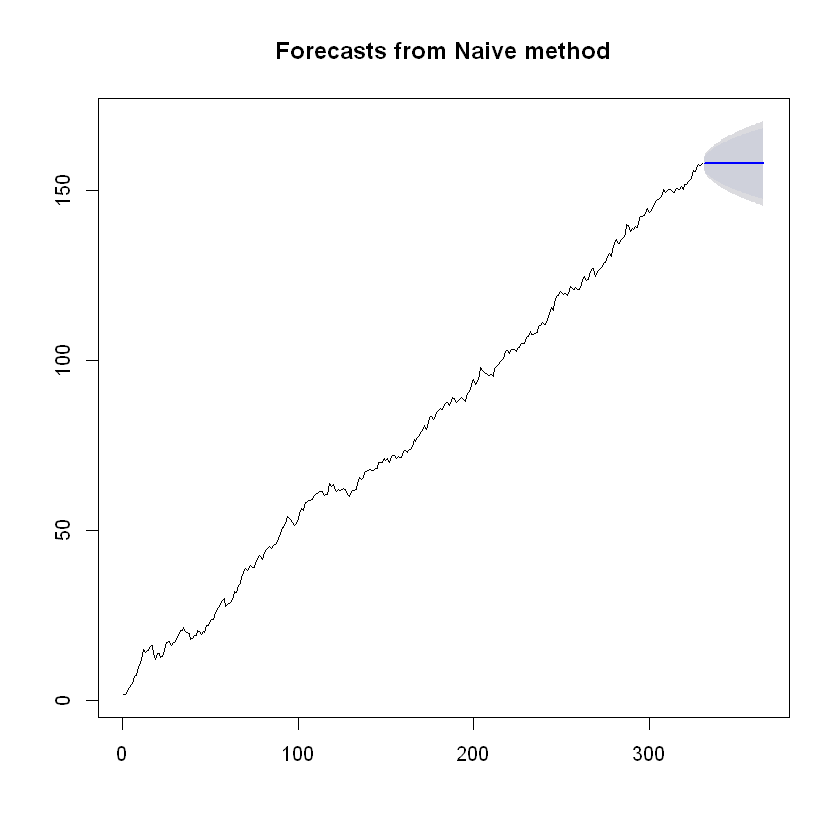

In [14]:
library("forecast")
rw.mn <-naive(window(rw, start=1,end=330),h=35,level=c(90,95))
plot(rw.mn)

Looking back at the grocery store manager example, using the naive method can make you order too much or too little bread if last week's sales were unusual. It gets worst for food which price can change drastically depending on the period. For example, lobster gets cheap during fishing season and using this method would under estimate the sales in the beginning of the fishing season and over estimate the sale during the week following this period. The naive method gives good result only when the time series is stable, so only when forecasting is not really useful!

<strong>Exercise 4</strong>
Calculate three averages: the average of all the observations, of the observations 115 to 330 and of observations 329 to 330. Use those three values as predictions of value from 331 to 365 and calculate the estimation error. Save the result in 3 different data frames.


In [15]:
mean.forecast<-data.frame(time=331:365,forecast=mean(rw),error=rw[331:365]-mean(rw))
mean.115.forecast<-data.frame(time=331:365,forecast=mean(rw[115:330]),error=rw[331:365]-mean(rw[115:330]))
mean.329.forecast<-data.frame(time=331:365,forecast=mean(rw[329:330]),error=rw[331:365]-mean(rw[329:330]))

By computing the mean of the whole data set and using this value to do the forecast, we get a bigger estimation error than with the naive method, but the less observations we use to compute the mean the better the forecast become. Using the mean of the time series as forecast value is called the mean method and is useful for white noise process, but it's not precise for non stationary time series, since his mean change over time. We can better better estimate that changing mean value by using a small number of observations in our computation. This method is called moving average and can be used to smooth the time series and easily make a prediction.

<strong>Exercise 5</strong>
Use the mean method with the <code>meanf()</code> function to predict the last 35 observations of the time series with an confidence interval of 90 and 95 percent.

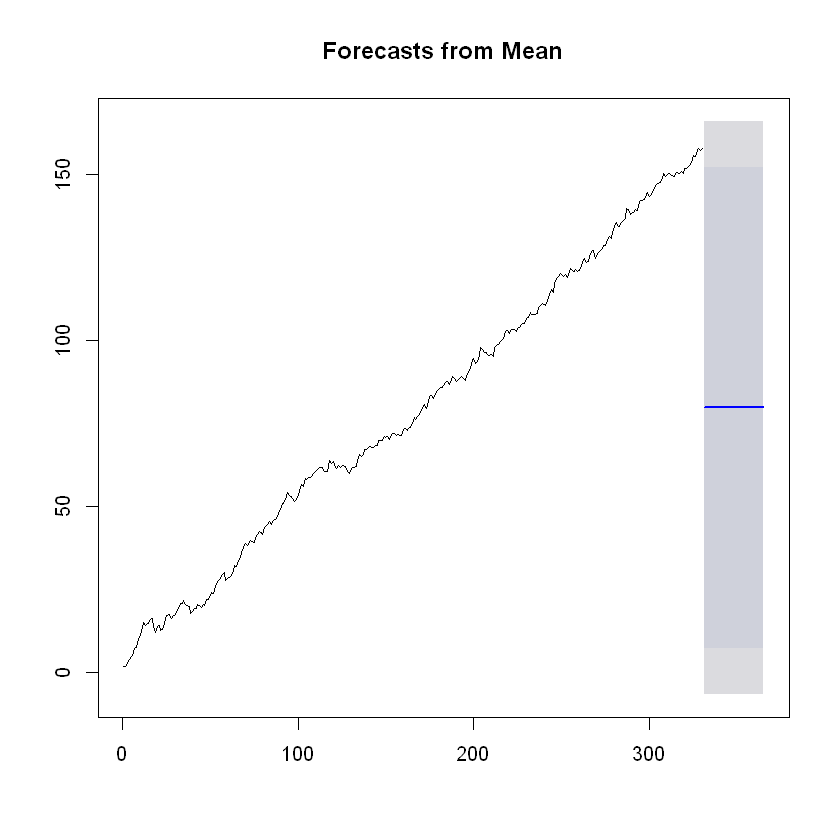

In [16]:
rw.mean<- meanf(window(rw, start=1,end=330),h=35,level=c(90,95))
plot(rw.mean)